In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [19]:
df = pd.read_csv('AirPassengers.csv')

In [20]:
df.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [21]:
df.dtypes

Month          object
#Passengers     int64
dtype: object

In [22]:
df['Month']= pd.to_datetime(df['Month'])

In [23]:
df.dtypes

Month          datetime64[ns]
#Passengers             int64
dtype: object

In [26]:
df.set_index('Month',inplace=True)

In [27]:
df

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


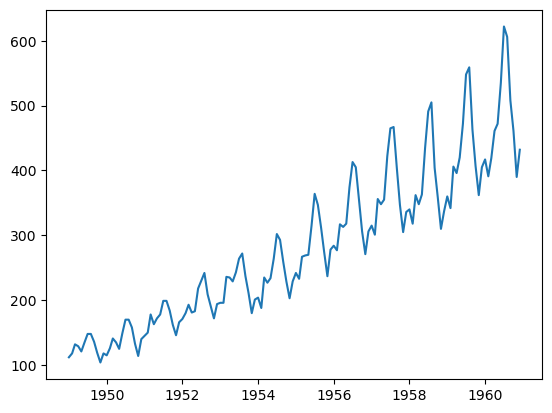

In [31]:
plt.plot(df)

In [41]:
df['year'] = [d.year for d in df.index]
df['month'] = [d.strftime('%b') for  d in df.index]
years = df['year'].unique()

<Axes: xlabel='year', ylabel='#Passengers'>

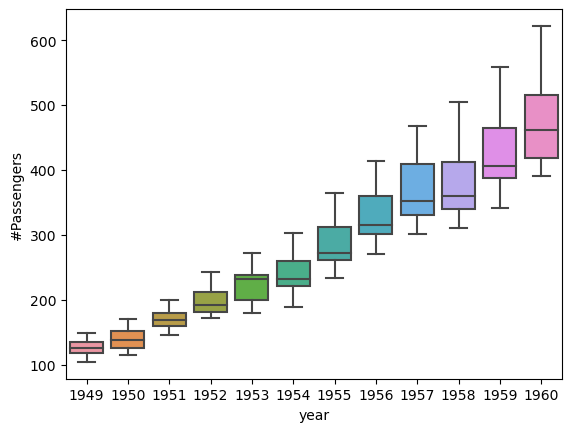

In [44]:
sns.boxplot(x='year',y='#Passengers',data=df)

<Axes: xlabel='month', ylabel='#Passengers'>

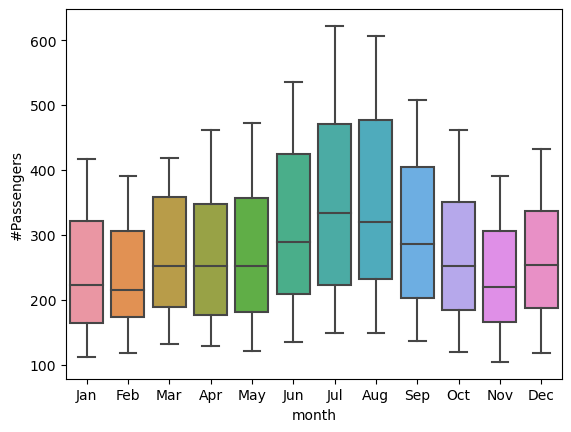

In [49]:
sns.boxplot(x='month',y='#Passengers',data=df)

In [53]:
from statsmodels.tsa.seasonal import seasonal_decompose 
decomposed = seasonal_decompose(df['#Passengers'],model = 'additve')

In [55]:
trend = decomposed.trend
seasonal = decomposed.seasonal
residual = decomposed.resid

In [57]:
trend

Month
1949-01-01   NaN
1949-02-01   NaN
1949-03-01   NaN
1949-04-01   NaN
1949-05-01   NaN
              ..
1960-08-01   NaN
1960-09-01   NaN
1960-10-01   NaN
1960-11-01   NaN
1960-12-01   NaN
Name: trend, Length: 144, dtype: float64

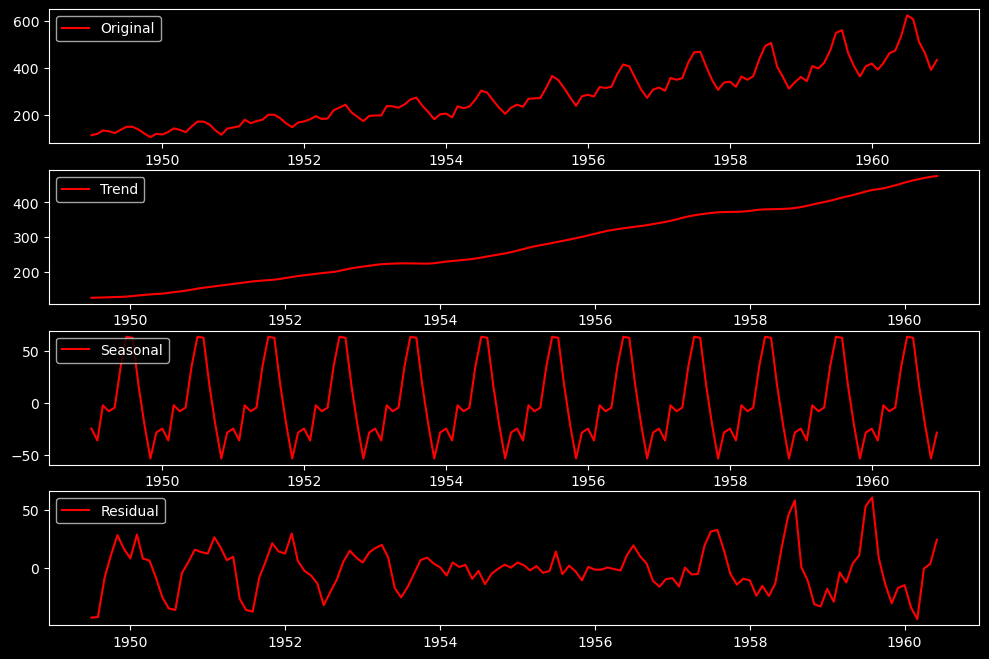

In [79]:
plt.style.use('dark_background')
plt.figure(figsize=(12,8))
plt.subplot(411)
plt.plot(df['#Passengers'], label = 'Original' , color= 'red')
plt.legend(loc='upper left')
plt.subplot(412)
plt.plot(trend, label = 'Trend', color='red')
plt.legend(loc='upper left')
plt.subplot(413)
plt.plot(seasonal, label = 'Seasonal' , color = 'red')
plt.legend(loc='upper left')
plt.subplot(414)
plt.plot(residual, label = 'Residual' , color= 'red')
plt.legend(loc='upper left')

In [82]:
from pmdarima.arima import ADFTest